> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, type the following in the console:


> `> ipython nbconvert [this_notebook.ipynb] --to slides --post serve`


> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View --> Cell Toolbar --> None`.

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Hierarchical Clustering

_Authors: David Yerrington (DC)_

---

![](https://snag.gy/J8iyBj.jpg)

### Learning Objectives
*By the end of this lesson, you will be able to:*

- Define the hierarchical clustering algorithm.
- Understand the differences between k-means and hierarchical clustering.
- Identify the difference between agglomerative clustering and divisive clustering.
- Plot, analyze, and understand a dendrogram.
- Explore the cophenetic correlation coefficient.
- Practice hierarchical clustering on language data.
- Gain an intuition for how clusters are selected with an interactive visualization.

### Lesson Guide
- [What is Hierarchical Clustering?](#what-is)
- [When Does Hierarchical Clustering Perform Well?](#when)
- [How is Hierarchical Clustering Different From K-Means Clustering?](#how)
- [How Does Hierarchical Clustering Work?](#how-work)
- [Single Linkage: Step-by-Step](#single)
- [Hierarchical Clustering in Python](#python)
    - [Evaluation With the Cophenetic Correlation Coefficient](#coph)
- [Intuition Behind the Cophenetic Correlation Coefficient](#intuition)
- [Visualizing Hierarchical Clustering on Language Skills Data](#guided-practice)
- [Conclusion](#conclusion)
- [Additional Resources](#resources)

<a name="what-is"></a>
## What is Hierarchical Clustering?

---

Hierarchical clustering is another common form of clustering analysis. With this type of clustering, we seek to do exactly what its name suggests: 

- Build hierarchies of clusters.
- Connect the clusters in the hierarchy with links.

Once the links are determined, we can display them in what is called a **dendrogram** — a graph that displays these links in their hierarchical structure.

![denex](./assets/denex.png)

To find clusters in a dendrogram, we can cut the graph — we'll cover this later in the lesson. 


<a id='when'></a>
## When Does Hierarchical Clustering Perform Well?

---

- Hierarchical clustering works well for non-spherical clusters.
- It also works well on smaller data sets. _This algorithm has a longer computational time and doesn't work well for larger data sets._

$$O(n^2 * n\ features)$$

#### Hierarchical clustering works well for instances when we are working with frequencies.

For instance, say you tallied the amount of times a certain skill exists in a collection of resumes. **Because k-means computes *means*, this wouldn't give us very good clusters.**

<a id='how'></a>
## How is Hierarchical Clustering Different From K-Means Clustering?
---

![](https://snag.gy/tfzWw6.jpg)

Hierarchical clustering, like k-means, is an unsupervised learning algorithm used to divide our data into groups. In k-means clustering, the algorithm groups data into a predefined set of clusters based on a process of determining the centroid points for the k clusters, calculating the geometric mean of classified points, and moving the centroid until no points change class.

**In hierarchical clustering, the algorithm builds classification trees using the data that merge groups of similar data points.**

In k-means, the boundaries between the various clusters are distinct and independent (see graph), whereas in hierarchical clustering, there are shared similarities between the groups represented by the classification tree.  

**Hierarchical clustering does not require you to define `k` as an input.**

![kmeans](./assets/kmeans.png)


**K-Means**

- Aims to achieve separation.
- Partitions are independent of each other.

**Hierarchical Clustering**

- Partitions can be visualized using a tree structure (a dendrogram).
- Does not need the number of clusters as input.
- it's possible to view partitions at different levels of granularities (i.e., can it refine/coarsen clusters) using different `k`s.
- Guaranteed to converge to the same solution (no random initialization).


<a name="how-work"></a>
## How Does Hierarchical Clustering Work?

---

There are two forms of hierarchical clustering: **agglomerative hierarchical clustering** and **divisive hierarchical clustering**. 
- Agglomerative works from the bottom up, starting with single data points and merging them into groups.
- Divisive works from the top down, starting with all of the data points and dividing them.

Whether starting from the top or bottom, the algorithm makes the best choice it can at each step to join or split the data based on the current sample. The hope is that these neighborhood best choices will approximate or equal the global best choice for clusters. It's an example of a **greedy algorithm**.


![](./assets/hier.png)

Today, we'll look at one of the fundamental methods for agglomerative hierarchical clustering: **linkage clustering**. Linkage clustering iterates through data points and computes the distance between groups by computing the distance between two data points using the **nearest neighbor** technique (similar to KNN).

> _Note: A **greedy algorithm** is an algorithm that follows the problem-solving heuristic of making the locally optimal choice at each stage with the hope of finding a global optimum._

<a id='single'></a>
## Single Linkage Step-by-Step

---

> **Note:** This walk through is for the agglomerative strategy.


Single linkage is also known as minimum distance clustering or nearest neighbor clustering.

![](assets/single_linkage.jpg)
The distance between two clusters is defined by the minimum distance between objects of the two clusters. 



#### First, Let's consider a single series of distances between `X` and `Y` points in a 2-D space, represented as a matrix.


![](assets/distances.jpg)  

_All points (A, B, C,...) are clusters._  
In each step of the iteration, we find the closest pair of clusters.  
Our end goal is to assemble all of these into a single cluster.  
**In this case, the closest cluster is between cluster F and D with a distance of 0.5.**  
**Thus, we group clusters D and F into cluster (D, F).**  

![](assets/distances2.jpg)  
D and F turn into a cluster.  
The distance matrix is updated (the distance between ungrouped clusters does not change).  
**Now we have to figure out how to calculate the distance between the newly grouped clusters (D, F) and the other clusters.**

![](assets/distances3.jpg)  
This is where our linkage function starts to do some work.  
Using single linkage, we specify the minimum distance between the original objects of the two clusters.  
We then find the minimum point from cluster ${d,f}$ to all other clusters.  
$d(d,f)\rightarrow a = min(d_{DA}, d_{FA}) = min(3.61, 3.20) = 3.20$  
$d(d,f)\rightarrow b = min(d_{DB}, d_{FB}) = min(2.92, 2.50) = 2.50$  
$d(d,f)\rightarrow c = min(d_{DC}, d_{FC}) = min(2.24, 2.50) = 2.24$  
$d(d,f)\rightarrow e = min(d_{DE}, d_{FE}) = min(1.00, 1.12) = 1.00$  


![](assets/distances4.jpg)  
**Cluster B and cluster A are now 0.71, which creates cluster (A, B).**

Now we update the distance matrix.
Using the **original** input distance matrix (size six by six), distance between cluster C and cluster (D, F) is computed as:  


$d_{(c)\rightarrow (a,b)} = min(d_{CA}, d_{CB}) = min(5.66, 4.95) = 4.95$  


The distance between cluster (D, F) and cluster (A, B) is the minimum distance between all objects involved in the two clusters. 


$d_{(d,f)\rightarrow (a,b)} = min(d_{DA}, d_{DB}, d_{FA}, d_{FB}) = min(2.61, 2.92, 3.20, 2.50) = 2.50$  


Now we compute $e$ and $(a,b)$.  

$d(e)\rightarrow (a,b) = min(d_{E}, d_{AB}) = min(4.24, 3.54) = 3.54$  


![](assets/distances5.jpg) 
**Here's our updated distance matrix:**  
$d_{((D,F),E)\rightarrow(AB)} = MIN(d_{DA},d_{DB},d_{FA},d_{FB},d_{EB}) = MIN(3.61, 2.92, 3.20, 2.50, 4.24, 3.54) = 2.50$  
$d_{(D,F), E)\rightarrow C} = MIN(d_{DF}, d_{FC}, d_{EC}) = MIN(2.24,2.50,1.41) = 1.41$  

![](assets/distances6.jpg) 
$d_{(((D,F), E),C)\rightarrow(A, B)} = MIN(d_{DA},d_{DB},d_{FA}, d_{FB}, d_{EA}, d_{EB}, d_{CA}, d_{CB})$  
$d_{(((D,F), E),C)\rightarrow(A, B)} = MIN(3.61,2.92,3.20,2.50,4.24,3.54, 5.66, 4.95) = 2.50$
  
In the beginning, we had six clusters: A, B, C, D, E, and F.
We merged cluster D and F into cluster (D, F) at distance<strong> 0.50</strong>.  
We merged cluster A and cluster B into (A, B) at distance <strong>0.71</strong>.  
We merged cluster E and (D, F) into ((D, F), E) at distance <strong>1.00</strong>.  
We merged cluster ((D, F), E) and C into (((D, F), E), C) at distance <strong>1.41</strong>.  
We merged cluster (((D, F), E), C) and (A, B) into ((((D, F), E), C), (A, B)) at distance <strong>2.50</strong>.   
The last cluster contains all of the objects, thus concluding the computation.   
**Our final result can be represented in terms of a dendrogram such as:**  

![](assets/final.jpg) 

<a id='python'></a>
## Hierarchical Clustering in Python

---

Implementing hierarchical clustering in Python is as simple as calling a function from the SciPy toolbox:

```python
Z = linkage(X, 'ward')
```

Here, `X` represents the matrix of data that we're clustering and `'ward'` tells our algorithm which method to use to calculate the distance between our newly formed clusters. In this case, we're using **Ward's Method**, which seeks to minimize the variance when forming clusters. When calculating distance, the default is **Euclidean distance**.

After we cluster, we can calculate the dendrogram using a simple ```dendrogram()``` function from SciPy, which we can then draw using our handy  ```plt``` from Matplotlib. 

<a id='coph'></a>

### Evaluation With the Cophenetic Correlation Coefficient

To check how well our algorithm has measured the distance, we can calculate the **cophenetic correlation coefficient**. This metric measures the height of the dendrogram at the point where two branches merge. It can tell us how well the dendrogram has measured the distance between data points in the original data set.

```python
c, coph_dists = cophenet(Z, pdist(X))
```

Here, we call the cophenetic function using ```cophenet``` from SciPy and apply it to our clustered set, `Z`, and the distance of our original set, `X`. 

## Intuition for the Cophenetic Correlation Coefficient

- Based on the interpoint distance within clusters.
- Considers $MIN(C_i)$ when looking at the distance between clusters (product moment correlation).
- Values closer to $one$ are considered good in terms of fusion (how well clusters sit with each other).

[Detailed cophenetic coefficient calculation](https://en.wikipedia.org/wiki/Cophenetic_correlation#Calculating_the_cophenetic_correlation_coefficient).

$$
c = \frac {\sum_{i<j} (x(i,j) - \bar{x})(t(i,j) - \bar{t})}{\sqrt{[\sum_{i<j}(x(i,j)-\bar{x})^2] [\sum_{i<j}(t(i,j)-\bar{t})^2]}}.
$$





<a name="guided-practice"></a>
## Visualizing Hierarchical Clustering on Language Skills Data

---

Let's say you're asked to perform a hierarchical clustering analysis on a new data set — how would you go about it?

We'll now perform a hierarchical clustering analysis on a data set that details language skills from different European countries.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os

%matplotlib inline

We're going to be using **SciPy** for our analysis. Let's load in the data set using Pandas' ```read.csv()``` and check the head to see its structure.

In [2]:
lang = pd.read_csv("./datasets/lang.csv")
lang.head()

,country,finnish,swedish,danish,norwegian,english,german,dutch,flemish,french,italian,spanish,portuguese
0,1,0,0,0,0,21,100,2,1,10,2,1,0
1,2,0,0,0,0,5,3,0,0,11,100,1,0
2,3,0,2,3,0,10,7,1,1,100,12,7,1
3,4,0,0,0,0,41,47,100,100,16,2,2,0
4,5,0,0,0,0,14,15,0,59,44,2,1,0


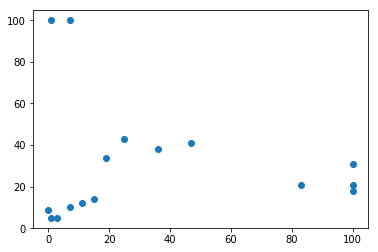

In [3]:
# How many clusters does it look like we have?
plt.scatter(lang['german'], lang['english'])
plt.show()

Now let's convert our data to a matrix (a.k.a., array) to pass to the clustering algorithm — the matrix makes it easier for our algorithm to compute distance.

In [6]:
X = lang.values

Next, we'll implement the actual clustering algorithm using the **`'ward'`** method (described in detail earlier).

In [7]:
Z = linkage(X, 'ward')
Z

array([[  0.        ,   8.        ,  10.48808848,   2.        ],
       [  6.        ,  15.        ,  17.29161647,   2.        ],
       [  5.        ,   9.        ,  37.12142239,   2.        ],
       [  2.        ,   4.        ,  82.06704576,   2.        ],
       [ 16.        ,  18.        , 103.69667304,   4.        ],
       [ 11.        ,  12.        , 115.41230437,   2.        ],
       [ 10.        ,  21.        , 119.93887332,   3.        ],
       [  1.        ,  19.        , 133.66500415,   3.        ],
       [ 14.        ,  23.        , 139.49253266,   4.        ],
       [  7.        ,  24.        , 142.18473898,   5.        ],
       [ 13.        ,  25.        , 148.66068747,   6.        ],
       [ 17.        ,  22.        , 158.59529207,   5.        ],
       [  3.        ,  20.        , 191.10991602,   5.        ],
       [ 26.        ,  27.        , 192.04241956,  11.        ],
       [ 28.        ,  29.        , 226.23253323,  16.        ]])

Now, we can calculate the cophenetic correlation coefficient to see how well our algorithm has measured the distances between the points.

In [8]:
c, coph_dists = cophenet(Z, pdist(X))

In [9]:
c

0.6664592560324294

You should see a **C** around **0.667**, which means that the distances of the clusters are somewhat related to the original distances of the data.

Now, let's plot the dendrogram. To do this, we call dendrogram from ```scipy.cluster.hierarchy```, input our links, and rotate the labels so we can view the graph in a more organized matter. 

#### We can then plot the dendrogram with Pyplot from Matplotlib.

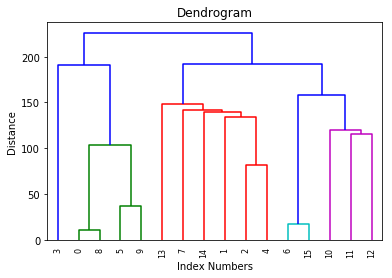

In [11]:
def plot_dendogram(df):
    
    # Data preparation:
    X = df.values
    Z = linkage(X, 'ward')
    
    # Plotting:
    plt.title('Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
    
plot_dendogram(lang)

### Determining the Clusters

While there are many ways to automate this process, we can visually assess the dendrogram and set a maximum distance to help estimate the clusters.

Here, we can see that no links exist above a distance of 200. Use the ```fclusters``` function from ```scipy.cluster.hierarchy``` with this maximum distance to return our cluster IDs. 

In [12]:
max_dist = 200 # Pairwise distance.
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

Lastly, let's plot our data and assign the class labels as the color:

In [13]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

In [14]:
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # Pairwise distance.
    plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print("Clusters represented at distance: ", set(clusters))
    
    # Complete color maps from Matplotlib.
    
    # Plotting.
    # Add a legend with some customizations.
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].scatter(X[:,0], X[:,6], c=clusters, cmap=cm.jet, s=40)

    ax[0].set_title("Max Dist: %d" % max_dist)
    
    plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
    ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax[1].plot((0, 200), (max_dist, max_dist), 'r--')
    
    ax[1].set_title('Dendrogram')
    ax[1].set_xlabel('Index Numbers')
    ax[1].set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
        #link_color_func=lambda color: plt.get_cmap('Miscellaneous'),
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()

In [15]:
interact(plot_wrapper, max_dist=IntSlider(min=100, max=200, step=1))

interactive(children=(IntSlider(value=100, description='max_dist', max=200, min=100), Output()), _dom_classes=…

<function __main__.plot_wrapper(max_dist)>

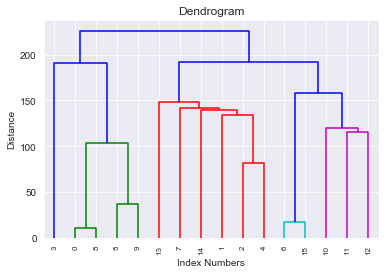

Clusters represented at distance:  {1}


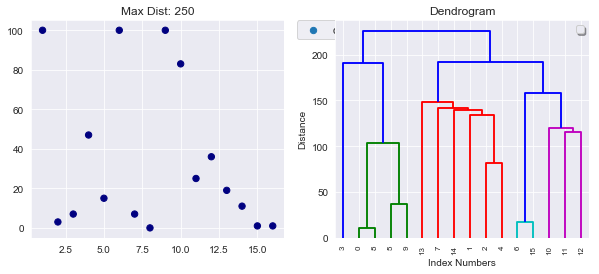

Clusters represented at distance:  {1, 2}


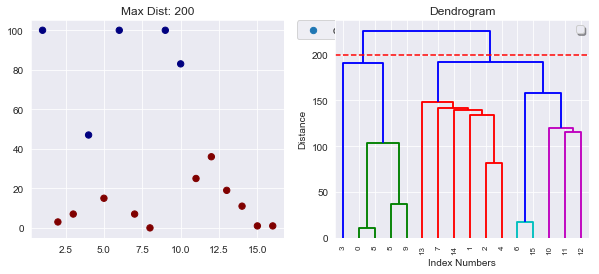

Clusters represented at distance:  {1, 2, 3, 4, 5}


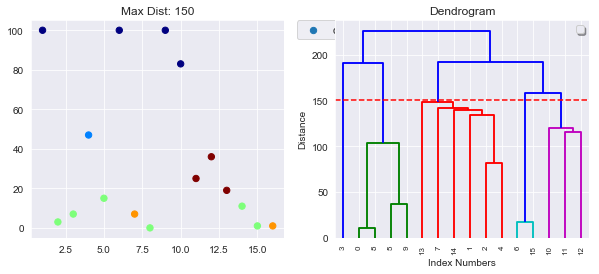

Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


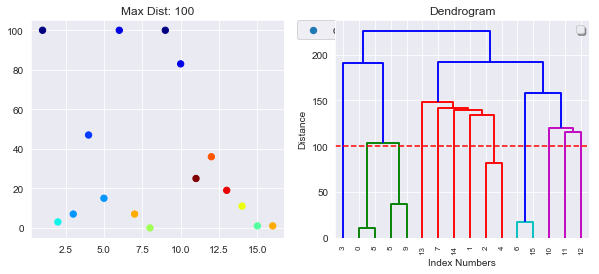

Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}


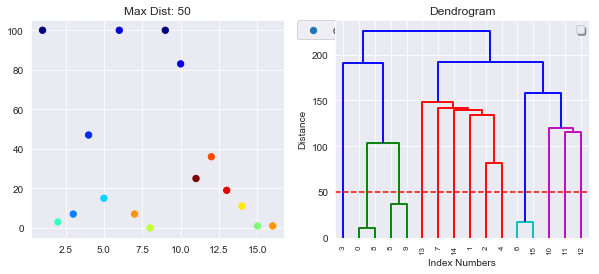

Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


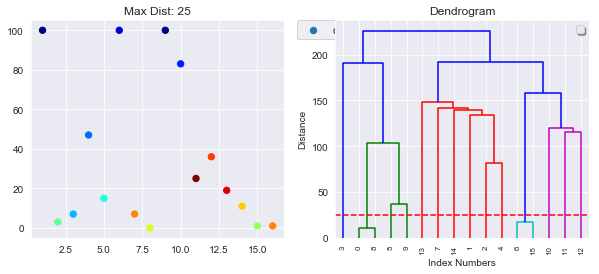

In [16]:
plot_dist_thresh(250)
plot_dist_thresh(200)
plot_dist_thresh(150)
plot_dist_thresh(100)
plot_dist_thresh(50)
plot_dist_thresh(25)

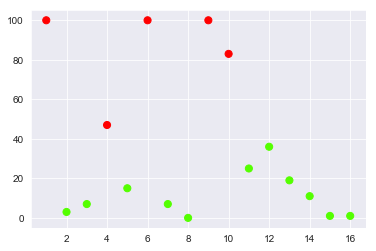

In [17]:
plt.scatter(X[:,0], X[:,6], c=clusters, cmap='prism', s=50)
plt.show()

<a name="conclusion"></a>
## Conclusion
---

- Recall the definitions of linkage, cophenetic coefficient, and dendrogram.
- Recap the process steps in hierarchical clustering.
    - Linkage: First, we create the linkages in Python that form the basis of our analysis.
    - Cophenetic coefficient: We find the cophenetic coefficient to determine how well our analysis is running.
    - Dendrogram: We plot the dendrogram and visually inspect the clusters.
    - Lastly, we find our cluster IDs and plot.

<a id='resources'></a>
## Additional Resources 

---

- [SciPy documentation for linkage techniques](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.cluster.hierarchy.linkage.html)
- [What Even is This Hierarchical Clustering Thing, Anyway?](http://www.saedsayad.com/clustering_hierarchical.htm)
- [Scikit-learn documentation](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) on hierarchical clustering.
- [Stanford's walk through of hierarchical clustering](http://www.econ.upf.edu/~michael/stanford/maeb7.pdf).
- [Wikipedia's entry](https://en.wikipedia.org/wiki/Hierarchical_clustering) on hierarchical clustering.
- [An example of hierarchical clustering: U.S. cities](http://www.analytictech.com/networks/hiclus.htm).
- [Wikipedia's entry](https://en.wikipedia.org/wiki/Cophenetic_correlation) on cophrenetic coefficients.
- [An intuitive explanation](http://people.revoledu.com/kardi/tutorial/Clustering/Cophenetic.htm) of cophrenetic coefficients.
- [Joseph Nelson's video](https://www.youtube.com/watch?v=62cphKGR0_s) explaining hierarchical clustering in seven minutes.
- A contrasting example of differing [cophrenetic coefficients](http://stats.stackexchange.com/questions/33066/on-cophenetic-correlation-for-dendrogram-clustering).